In [1]:
import numpy as np

REAL_P = .42

# Returns a 1 with probability P, 0 with probability 1-P
def flip(P):
    return np.random.choice([0, 1], p = [1-P, P])
flip(.5)

1

In [5]:
# Generate our sample
N = 100
sample = [flip(REAL_P) for i in range(N)]
print(sample)

[0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0]


In [6]:
def estimate_p(sample):
    return sum(sample) / len(sample)
print(estimate_p(sample))

0.43


In [7]:
# Number of resamples
B = 10000

# Size of each resample
resample_size = int(N - 1)

def resample_estimate():
    # Take a sample
    resample = np.random.choice(sample, size = resample_size, replace = True)
    # Return the estimate
    return estimate_p(resample)
    
resample_dist = [resample_estimate() for i in range(B)]

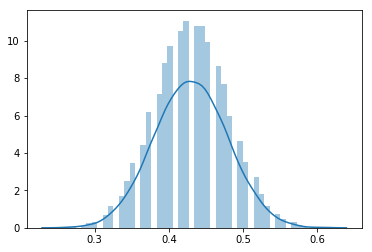

In [8]:
# Plot the resampling distribution (just for fun)
%matplotlib inline
import seaborn
seaborn.distplot(resample_dist)

In [9]:
# Oh wow so normal looking

# Now let's use the standard deviation of the resampled distribution
# to construct a 95% confidence interval of our estimate
estimated_p = estimate_p(sample)
stddev = np.std(resample_dist)
error = 1.96 * stddev
print("Confidence interval: (", estimated_p - error, ", ", estimated_p + error, ")")

Confidence interval: ( 0.33288069831 ,  0.52711930169 )


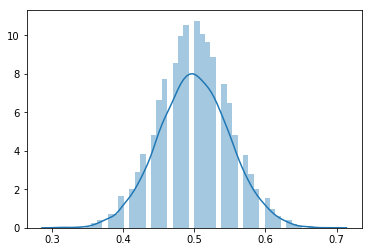

In [15]:
# Now let's try hypothesis testing.
# Let the null hypothesis be that this is a fair coin (p = .5)
# We generate a ton of samples given this assumption and we see how unlikely is our sample

B = 10000
def make_sample_estimate():
    heads = 0
    for i in range(N):
        heads = heads + flip(.5)
    return heads / N
null_samples = [make_sample_estimate() for j in range(B)]
seaborn.distplot(null_samples)

In [16]:
# In our sample distribution (assuming the null hypotheses),
# how unlikely is our sample's estimated_p?

count = 0
for p in null_samples:
    if p <= estimated_p:
        count = count + 1
count / B


0.0962